In [641]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #for data visuvalization
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data.csv


In [642]:
#loading dataset.
data=pd.read_csv("/kaggle/input/data.csv")
#print first 5 records of datasets
data.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [643]:
#droping unwanted column
data.drop('Unnamed: 0',axis=1,inplace=True)
data.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [644]:
#checking missing values
data.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

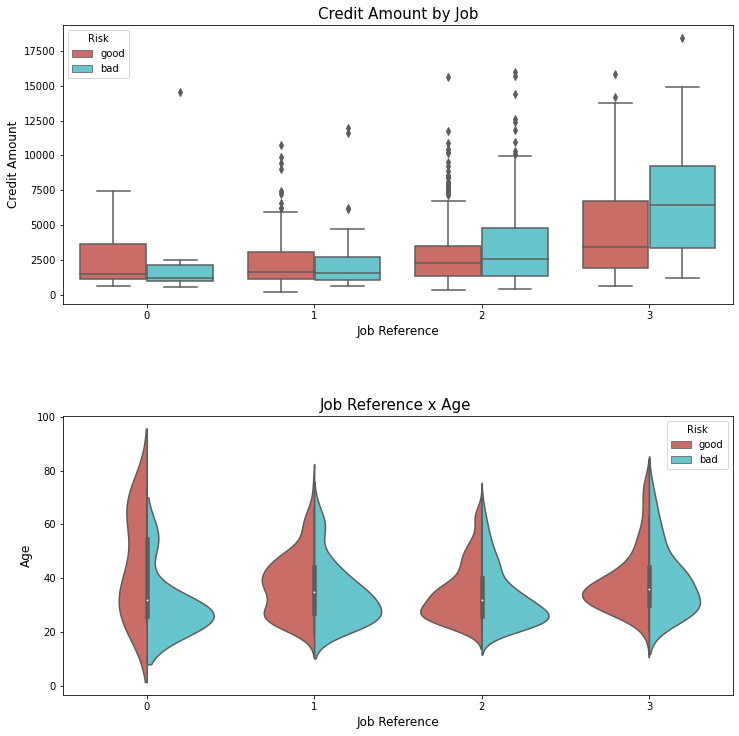

In [645]:
# create a figure and axis
fig,ax = plt.subplots(figsize =(12,12),nrows = 2)
g1 = sns.boxplot(x = "Job",y="Credit amount",data = data,palette = "hls",
                ax = ax[0],hue = "Risk")
g1.set_title("Credit Amount by Job",fontsize = 15)
g1.set_xlabel("Job Reference",fontsize = 12)
g1.set_ylabel("Credit Amount",fontsize = 12)
g2 = sns.violinplot(x = "Job",y = "Age",data =data,ax = ax[1],hue = "Risk",
                   split = True,palette = "hls")
g2.set_title("Job Reference x Age ",fontsize = 15)
g2.set_xlabel("Job Reference",fontsize = 12)
g2.set_ylabel("Age",fontsize = 12)
plt.subplots_adjust(hspace = 0.4,top = 0.9)

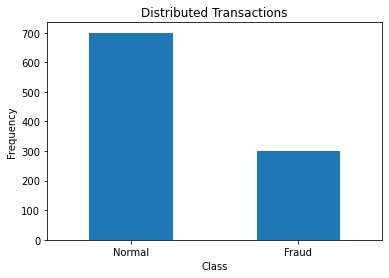

In [646]:
# plot normal and fraud
count_classes = pd.value_counts(data['Risk'], sort=True)
count_classes.plot(kind='bar', rot=0)
plt.title("Distributed Transactions")
plt.xticks(range(2), ['Normal', 'Fraud'])
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

In [647]:
def one_hot_encoder(df,nan_as_category = False):
    original_columns = list(df.columns)
    categorical_columns = [col for col in df.columns if df[col].dtype =='object']
    df = pd.get_dummies(df,columns = categorical_columns,dummy_na = 
                       nan_as_category,drop_first = True)
    new_columns = [c for c in df.columns if c not in original_columns]
    return df,new_columns
#Imputng missing values to no information
data['Saving accounts'] = data['Saving accounts'].fillna('no_inf')
data['Checking account'] = data['Checking account'].fillna('no_inf')
#converting AGE into intervals
interval = (18,25,35,45,120)
catagories = ['Student','Young','Adult','Senior']
data['Age_catagories'] = pd.cut(data.Age,interval,labels=catagories)
data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,Age_catagories
0,67,male,2,own,no_inf,little,1169,6,radio/TV,good,Senior
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad,Student
2,49,male,1,own,little,no_inf,2096,12,education,good,Senior
3,45,male,2,free,little,little,7882,42,furniture/equipment,good,Adult
4,53,male,2,free,little,little,4870,24,car,bad,Senior


In [648]:
#creating dummies
#Purpose to dummies
data = data.merge(pd.get_dummies(data.Purpose,drop_first = True,prefix = 'Purpose'),left_index = True,right_index = True)
#converting sex to numeric
data['sex']=data['Sex'].map({'male':1,'female':0})
#Hosuing
data = data.merge(pd.get_dummies(data.Housing,drop_first = True,prefix = 'Housing'),left_index = True,right_index = True)
#Housing get Saving account
data = data.merge(pd.get_dummies(data['Saving accounts'],drop_first = True,prefix = 'Savings'),left_index = True,right_index = True)
#converting  Risk to numeric
data['risk']=data['Risk'].map({'good':1,'bad':0})
#Housing get Checking account
data =data.merge(pd.get_dummies(data['Checking account'],drop_first = True,prefix = 'Checking'),left_index = True,right_index = True)

In [649]:
#converting AGE into intervals
interval = (18,25,35,45,120)
catagories = ['Student','Young','Adult','Senior']
data['Age_catagories'] = pd.cut(data.Age,interval,labels=catagories)
#Housing get Age Categories
data = data.merge(pd.get_dummies(data['Age_catagories'],drop_first = True,prefix = 'Age_catagories'),left_index = True,right_index= True)

In [650]:
#Applying  LOG to credit amount
data['Credit amount'] = np.log(data['Credit amount'])
data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,...,Savings_no_inf,Savings_quite rich,Savings_rich,risk,Checking_moderate,Checking_no_inf,Checking_rich,Age_catagories_Young,Age_catagories_Adult,Age_catagories_Senior
0,67,male,2,own,no_inf,little,7.063904,6,radio/TV,good,...,1,0,0,1,0,0,0,0,0,1
1,22,female,2,own,little,moderate,8.691315,48,radio/TV,bad,...,0,0,0,0,1,0,0,0,0,0
2,49,male,1,own,little,no_inf,7.647786,12,education,good,...,0,0,0,1,0,1,0,0,0,1
3,45,male,2,free,little,little,8.972337,42,furniture/equipment,good,...,0,0,0,1,0,0,0,0,1,0
4,53,male,2,free,little,little,8.490849,24,car,bad,...,0,0,0,0,0,0,0,0,0,1


In [651]:
#Deleting categorical columns
del data["Saving accounts"]
del data["Checking account"]
del data["Purpose"]
del data["Sex"]
del data["Housing"]
del data["Age_catagories"]
del data["Risk"]
del data['Age']
data.head()

,Job,Credit amount,Duration,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,...,Savings_no_inf,Savings_quite rich,Savings_rich,risk,Checking_moderate,Checking_no_inf,Checking_rich,Age_catagories_Young,Age_catagories_Adult,Age_catagories_Senior
0,2,7.063904,6,0,0,0,0,1,0,0,...,1,0,0,1,0,0,0,0,0,1
1,2,8.691315,48,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,7.647786,12,0,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
3,2,8.972337,42,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,2,8.490849,24,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [652]:
#feature slection
X=data.drop('risk',axis=True)#independent columns
y=data['risk'] #target column

In [653]:
#splitting the data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [654]:
#Standard scaling of data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [655]:
from sklearn.linear_model import LogisticRegression
# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)
# Predicting the Test set results
y_pred = logreg.predict(X_test)
y_pred

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1])

In [656]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[ 35,  51],
       [ 27, 187]])

In [657]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.74
Precision: 0.7857142857142857
Recall: 0.8738317757009346


In [658]:
#applying RandomForest
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [659]:
## Predicting the Test set results
y_pred = classifier.predict(X_test)

In [660]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[ 41  45]
 [ 34 180]]
Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.48      0.51        86
           1       0.80      0.84      0.82       214

    accuracy                           0.74       300
   macro avg       0.67      0.66      0.66       300
weighted avg       0.73      0.74      0.73       300

Accuracy: 0.7366666666666667
